In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
data = pd.read_csv("Dataset/final_df.csv")
total_percent = pd.read_csv("Dataset/total_percent.csv")
data.head()
holi_sum = pd.read_csv("Dataset/summary_holiday.csv")
holi_sum["Weekly_Sales"] = holi_sum["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
unrate_ave = pd.read_csv("Dataset/rate_avg_holiday.csv")
unrate_ave["Weekly_Sales"] = unrate_ave["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
temp_ave = pd.read_csv("Dataset/temp_avg_is.csv")
temp_ave["Weekly_Sales"] = temp_ave["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)

In [133]:
import datetime as datetime
#dates = data["Date"].replace("-", "/")
data["Date"] = data["Date"].str.replace("-","/")
for date in data["Date"]:
    data["Date"] = datetime.datetime.strptime(date,"%Y/%m/%d").strftime("%m/%d/%Y")
data["Date"]

0       02/05/2010
1       02/05/2010
2       02/05/2010
3       02/05/2010
4       02/05/2010
           ...    
7600    02/05/2010
7601    02/05/2010
7602    02/05/2010
7603    02/05/2010
7604    02/05/2010
Name: Date, Length: 7605, dtype: object

In [28]:
regular_sales_total = data.loc[data["Is Holiday"]=="No Holiday"]["Weekly_Sales"].sum()
holiday_sales_total = data.loc[data["Is Holiday"]=="Holiday"]["Weekly_Sales"].sum()
holiday

534564028.89

In [29]:
weekly_sales = data["Weekly_Sales"]
ave_temperature = data["Temperature"]
ave_fuel_price = data["Fuel_Price"]
un_rate = data["Unemployment"]
cpi = data["CPI"]
store_number = data["Store"]

In [25]:
regular_sales_total
markdown_sales_total

types = ["Regular Sales","Markdown Sales"]
sales = data["violent crime rate"]
explode = (0,1)
plt.title("Markdown Sales vs. Regiular Sales")
plt.pie(sales, labels = types, autopct="%1.1f%%", shadow = True)
plt.axis("equal")

NameError: name 'markdown_sales_total' is not defined

(-1.1076047862999432,
 1.1003621571621467,
 -1.1018516780641336,
 1.107699260694615)

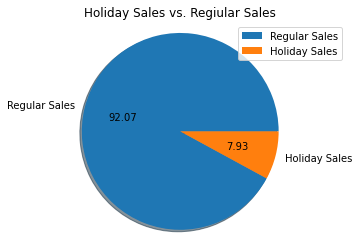

In [61]:
#PIE CHART TOTAL HOLIDAY AND NON HOLIDAY SALES
regular_sales_total
holiday_sales_total

types = ["Regular Sales","Holiday Sales"]
sales = [regular_sales_total, holiday_sales_total]
explode = (0,1)
plt.title("Holiday Sales vs. Regiular Sales")
plt.pie(sales, labels = types, shadow = True,autopct='%.2f')
plt.legend()
plt.axis("equal")

<Figure size 14400x7200 with 0 Axes>

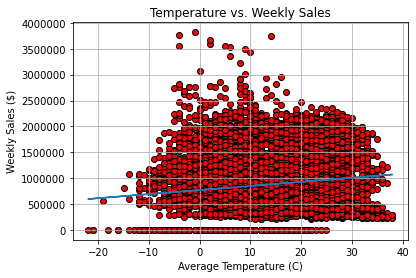

<Figure size 14400x7200 with 0 Axes>

In [55]:
#SCATTER PLOT BY AVERAGE TEMPERATURE
ave_temperature
weekly_sales

plt.title("Temperature vs. Weekly Sales")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(-50,50)
#plt.ylim(0,100000)
plt.grid()
plt.scatter(ave_temperature, weekly_sales, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')
slope, intercept, r_value, p_value, std_err = st.linregress(ave_temperature, weekly_sales)
best_fit = slope*ave_temperature+intercept
plt.plot(ave_temperature,best_fit)
plt.figure(figsize=(200,100)) 

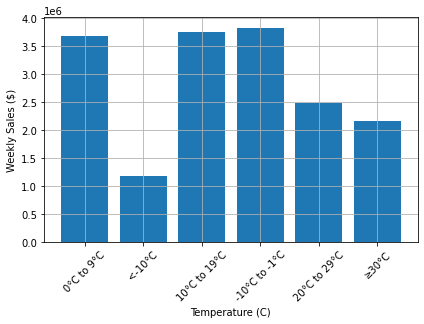

In [100]:
#BAR GRAPH by TEMP CATEGORY
plt.bar(data["Temp Category"],data["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

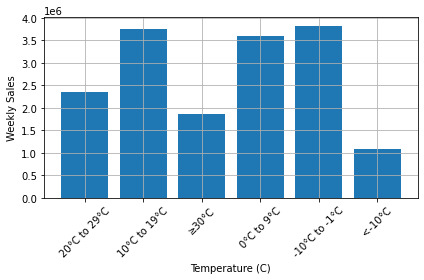

In [99]:
#HOLIDAY WEEKLY SALES BY TEMPERATURE CATEGORY
bars = data.loc[data["Is Holiday"]=="Holiday"]
plt.bar(bars["Temp Category"],bars["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

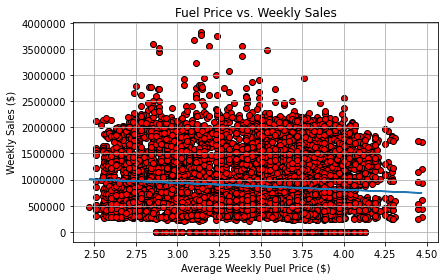

In [98]:
#SCATTER by FUEL PRICE
ave_fuel_price
weekly_sales

plt.title("Fuel Price vs. Weekly Sales")
plt.xlabel("Average Weekly Puel Price ($)")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.grid()
plt.scatter(ave_fuel_price, weekly_sales, marker="o", color="red",edgecolors="black")
plt.ticklabel_format(style='plain')
slope, intercept, r_value, p_value, std_err = st.linregress(ave_fuel_price, weekly_sales)
best_fit = slope*ave_fuel_price+intercept
plt.plot(ave_fuel_price,best_fit)

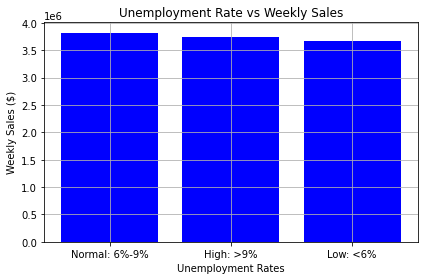

In [97]:
#WEKLY SALES BY UNEMPLOYMENT CATEGORIES
unemp_categories = data["Unemployment Category"]
weekly_sales = data["Weekly_Sales"]

plt.title("Unemployment Rate vs Weekly Sales")
plt.bar(unemp_categories, weekly_sales, color="blue")
plt.xlabel("Unemployment Rates")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

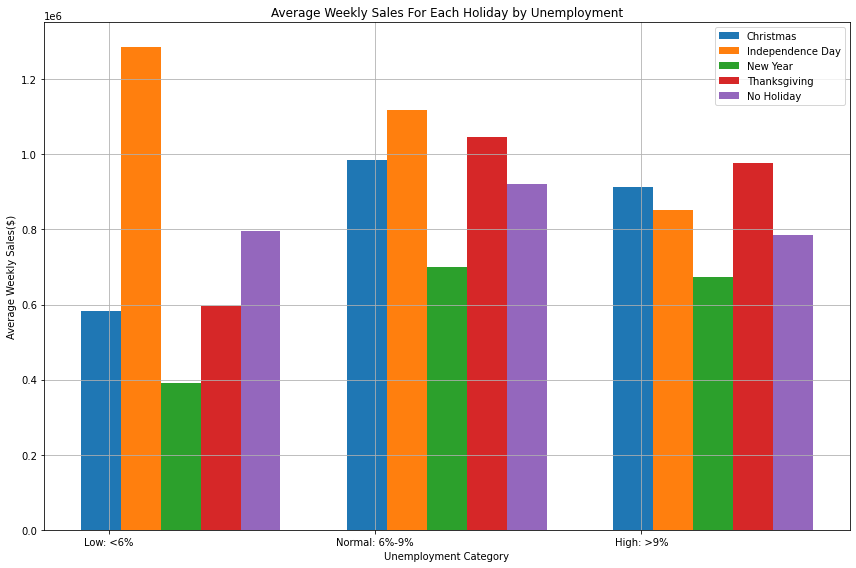

In [247]:
#AVERAGE WEEKLY SALES FOR EACH HOLIDAY BY UNEMPLOYMENT CATEGORY
bar_width = 0.15
fig, ax = plt.subplots(figsize=(12, 8))
r1 = np.arange(len(unrate_ave["Unemployment Category"].unique()))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
b1 = ax.bar(r1, unrate_ave.loc[unrate_ave["Holiday Name"] == 'Christmas', 'Weekly_Sales'],width=bar_width, label="Christmas")
b2 = ax.bar(r2, unrate_ave.loc[unrate_ave["Holiday Name"] == 'Independence Day', 'Weekly_Sales'],width=bar_width, label="Independence Day")
b3 = ax.bar(r3, unrate_ave.loc[unrate_ave["Holiday Name"] == 'New Year', 'Weekly_Sales'],width=bar_width, label = "New Year")
b4 = ax.bar(r4, unrate_ave.loc[unrate_ave["Holiday Name"] == 'Thanksgiving', 'Weekly_Sales'],width=bar_width, label = "Thanksgiving")
b3 = ax.bar(r5, unrate_ave.loc[unrate_ave["Holiday Name"] == 'No Holiday', 'Weekly_Sales'],width=bar_width, label = "No Holiday")
ax.set_xticks(x + bar_width / 5)
ax.set_xticklabels(unrate_ave["Unemployment Category"])
plt.title("Average Weekly Sales For Each Holiday by Unemployment")
plt.ylabel("Average Weekly Sales($)")
plt.xlabel("Unemployment Category")
ax.legend()
plt.tight_layout()
plt.grid()

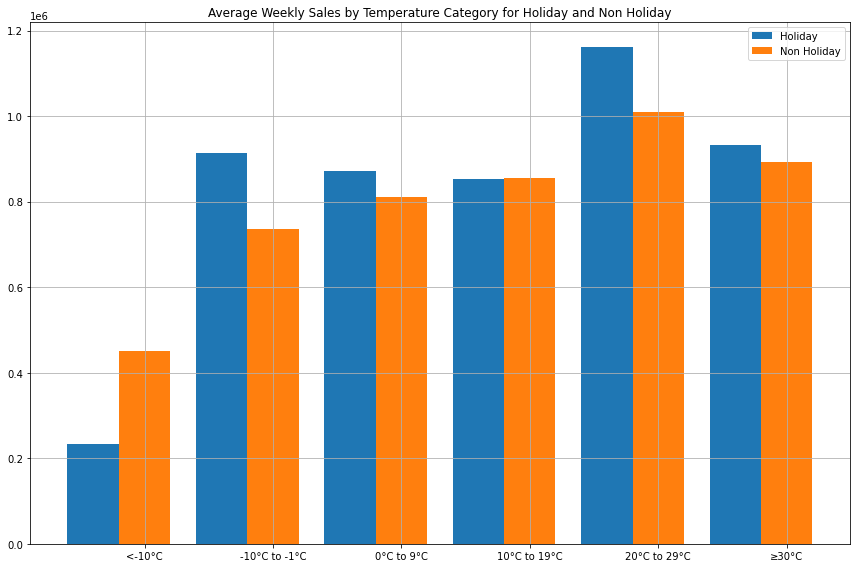

In [252]:
bar_width = 0.4
fig, ax = plt.subplots(figsize=(12, 8))
r1 = np.arange(len(temp_ave["Temp Category"].unique()))
r2 = [x + bar_width for x in r1]
b1 = ax.bar(r1, temp_ave.loc[temp_ave["Is Holiday"] == 'Holiday', 'Weekly_Sales'],width=bar_width, label="Holiday")
b2 = ax.bar(r2, temp_ave.loc[temp_ave["Is Holiday"] == 'No Holiday', 'Weekly_Sales'],width=bar_width, label="Non Holiday")
ax.set_xticks(x + bar_width/2)
plt.xticks([r + bar_width for r in range(len(temp_ave["Temp Category"].unique()))], ["<-10°C","-10°C to -1°C","0°C to 9°C","10°C to 19°C","20°C to 29°C","≥30°C"])
#ax.set_xticklabels(["<-10°C","-10°C to -1°C","0°C to 9°C","10°C to 19°C","20°C to 29°C","≥30°C"])
plt.title("Average Weekly Sales by Temperature Category for Holiday and Non Holiday")
ax.legend()
plt.tight_layout()
plt.grid()

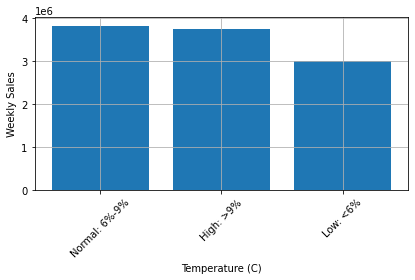

In [96]:
#TOTAL WEKLY SALES BY UNEMPLOYMENT CATEGORIES
bars = data.loc[data["Is Holiday"]=="Holiday"]
plt.bar(bars["Unemployment Category"],bars["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

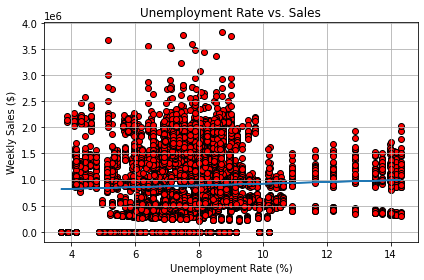

In [101]:
#SCATTER UNEMPLOYMENT RATE V SALES
plt.title("Unemployment Rate vs. Sales")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(4,15)
#plt.ylim(0,5000000)
plt.scatter(un_rate, weekly_sales, marker="o", color="red", edgecolor="black")
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)
plt.grid()
plt.tight_layout()

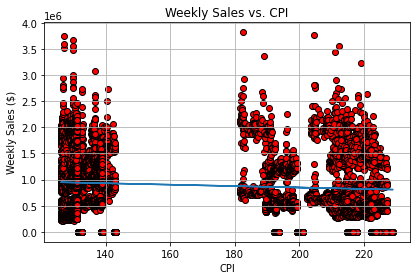

In [246]:
#WEEKLY SALES BY CPI
weekly_sales
cpi
plt.title("Weekly Sales vs. CPI")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("CPI")
plt.tight_layout()
plt.scatter(cpi,weekly_sales,marker="o", color="red",edgecolor="black")
slope, intercept, r_value, p_value, std_err = st.linregress(cpi, weekly_sales)
best_fit = slope*cpi+intercept
plt.plot(cpi,best_fit)
plt.grid()


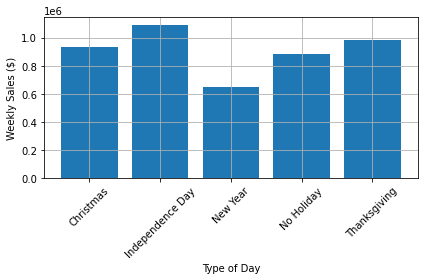

In [196]:
#AVERAGE WEEKLY SALES BY HOLIDAY
plt.bar(holi_sum["Holiday Name"],holi_sum["Weekly_Sales"])
plt.xlabel("Type of Day")
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

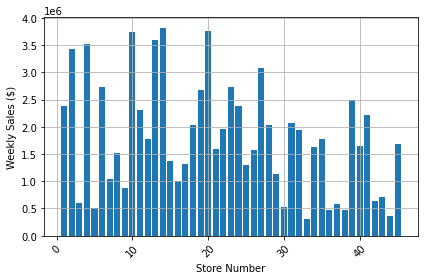

In [165]:
#holiday sales by store number

bars = data.loc[data["Is Holiday"]=="Holiday"]
plt.bar(bars["Store"],bars["Weekly_Sales"])
plt.xlabel("Store Number")
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

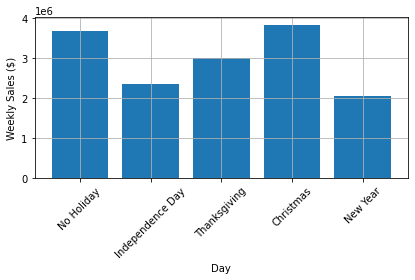

In [173]:
#TOTAL WEEKLY SALES By HOLIDAY
plt.bar(data["Holiday Name"],data["Weekly_Sales"])
plt.xlabel("Day")
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show

In [159]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 
import matplotlib.dates as mdates
import matplotlib.axis as ax
dates = data["Date"]
x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in dates]
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.XAxis.set_major_formatter(formatter)
x_values

TypeError: set_major_formatter() missing 1 required positional argument: 'formatter'

ValueError: x and y must be the same size

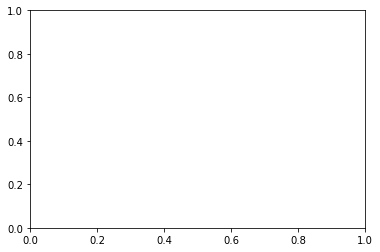

In [153]:
#SCATTER OF ALL HOLIDAYS
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 
import matplotlib.dates as mdates
date1 = datetime.datetime(2010, 2, 5) 
date2 = datetime.datetime(2013, 4, 26)
delta = datetime.timedelta(hours = 24) 
date_range = drange(date1, date2, delta) 
christmas = data.loc[data["Holiday Name"]=="Christmas"]
#thanksgiving = data.loc[data["Holiday Name"]=="Thanksgiving"]
#independence_day = data.loc[data["Holiday Name"]=="Independence Day"]
#new_years = data.loc[data["Holiday Name"]=="New Year"]
#no_holiday = data.loc[data["Holiday Name"]=="No Holiday"]
#date = data["Date"]
weekly_xmas_sales = christmas["Weekly_Sales"]
#weekly_thanks_sales = thanksgiving["Weekly_Sales"]
#weekly_ind_sales = independence_day["Weekly_Sales"]
#weekly_ny_sales = new_years["Weekly_Sales"]
#weekly_regular_sales = no_holiday["Weekly_Sales"]
plt.scatter(date_range,weekly_xmas_sales,marker="o",color="red")
#plt.scatter(x_values,weekly_thanks_sales,marker="o",color="blue")
#plt.scatter(x_value,weekly_ind_sales,marker="o",color="green")
#plt.scatter(x_values,weekly_ny_sales,marke="o",color="yellow")
#plt.scatter(x_values,weekly_regular_sales,marker="o",color="orange")       
plt.legend(loc="best")
plt.tight_layout()

In [ ]:
#AVERAGE WEEKLY SALES BY 